## Machine Learning Nanodegee - Capstone Project

### Exploratory Data Analysis

The dataset was first loaded and the distributions of each feature was visualized.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline

# Load data and display records
data = pd.read_csv("Autism_Data.csv", skiprows = [1])

display(data.head(n=10))

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO
5,1,1,1,1,1,0,1,1,1,1,...,m,Others,yes,no,'United States',no,9,'18 and more',Self,YES
6,0,1,0,0,0,0,0,1,0,0,...,f,Black,no,no,'United States',no,2,'18 and more',Self,NO
7,1,1,1,1,0,0,0,0,1,0,...,m,White-European,no,no,'New Zealand',no,5,'18 and more',Parent,NO
8,1,1,0,0,1,0,0,1,1,1,...,m,White-European,no,no,'United States',no,6,'18 and more',Self,NO
9,1,1,1,1,0,1,1,1,1,0,...,m,Asian,yes,yes,Bahamas,no,8,'18 and more','Health care professional',YES


In [2]:
# Assess number of records and class distribution

num_records = len(data)
num_ASD = len(data.loc[data['Class/ASD'] == 'YES'])
num_no_ASD = len(data.loc[data['Class/ASD'] == 'NO'])
ASD_percent = float(num_ASD)/num_records * 100

print("Total number of records: {}".format(num_records))
print("Patients with ASD: {}".format(num_ASD))
print("Patients without ASD: {}".format(num_no_ASD))
print("Percentage of patients with ASD: {:.2f}%".format(ASD_percent))

Total number of records: 704
Patients with ASD: 189
Patients without ASD: 515
Percentage of patients with ASD: 26.85%


In [3]:
# Summarize data
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [4]:
# Check data types
data.dtypes

A1_Score            int64
A2_Score            int64
A3_Score            int64
A4_Score            int64
A5_Score            int64
A6_Score            int64
A7_Score            int64
A8_Score            int64
A9_Score            int64
A10_Score           int64
age                object
gender             object
ethnicity          object
jundice            object
austim             object
contry_of_res      object
used_app_before    object
result              int64
age_desc           object
relation           object
Class/ASD          object
dtype: object

In [5]:
# Class column of 'result' was dropped as this is a variable that depends on the A1_score etc. values.
# Rename columns for clarity.

data = data.drop(['result'], axis=1)
data = data.rename(columns={'jundice': 'jaundice', 'austim': 'family_ASD', 'contry_of_res': 'country'})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002376C005EF0>,
      dtype=object)

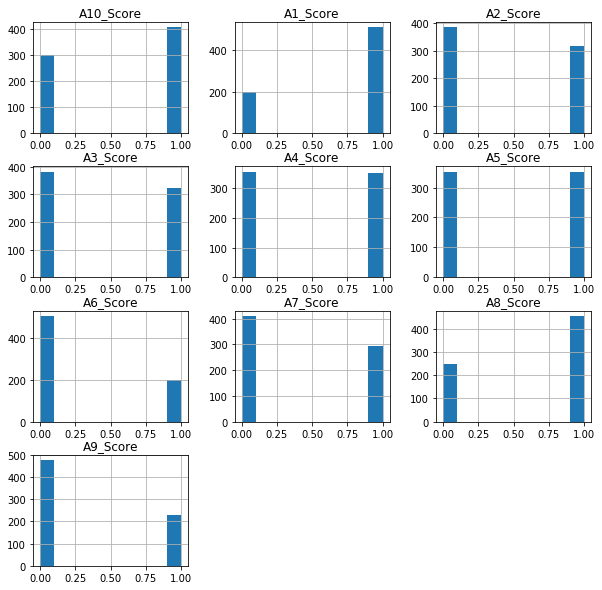

In [6]:
# Visualize continuous data
import seaborn
data[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', \
      'A8_Score', 'A9_Score', 'A10_Score']].hist(figsize = (10,10))

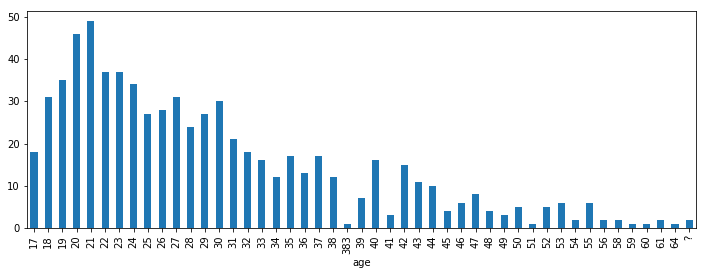

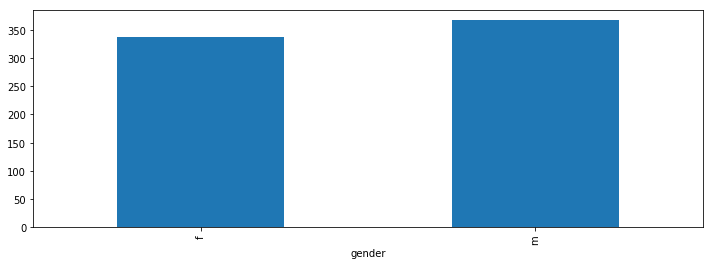

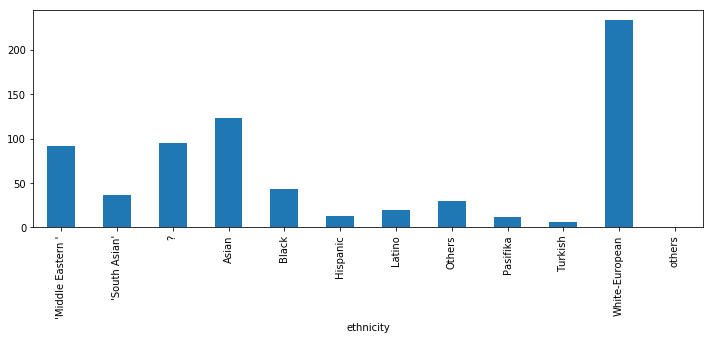

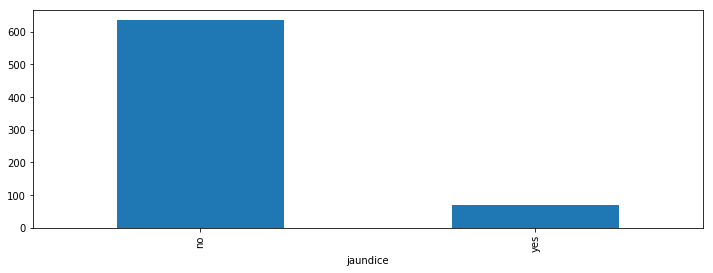

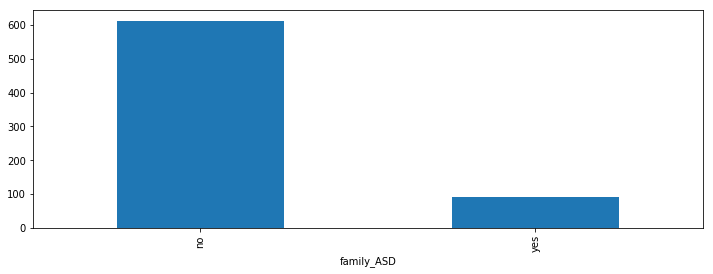

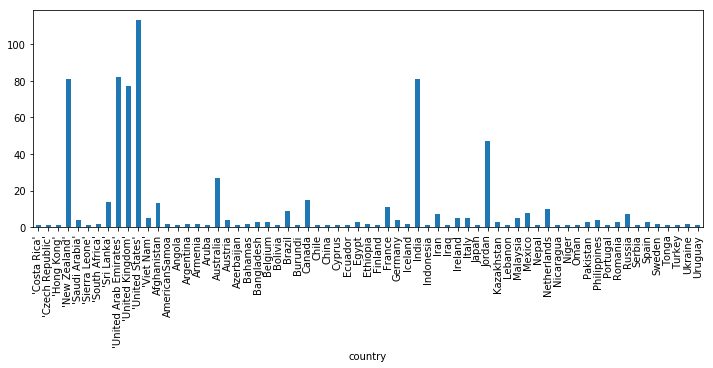

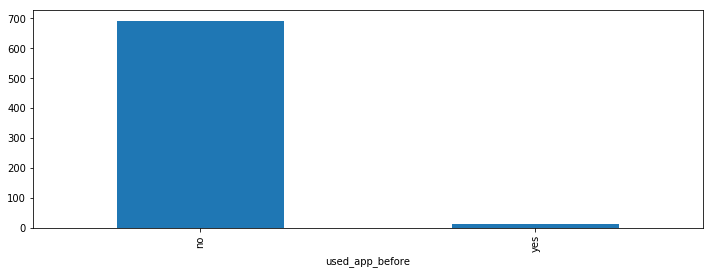

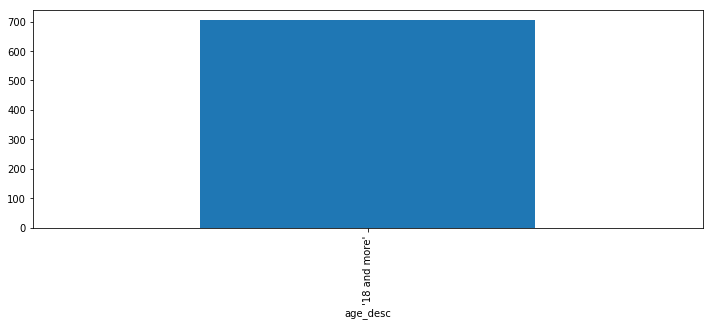

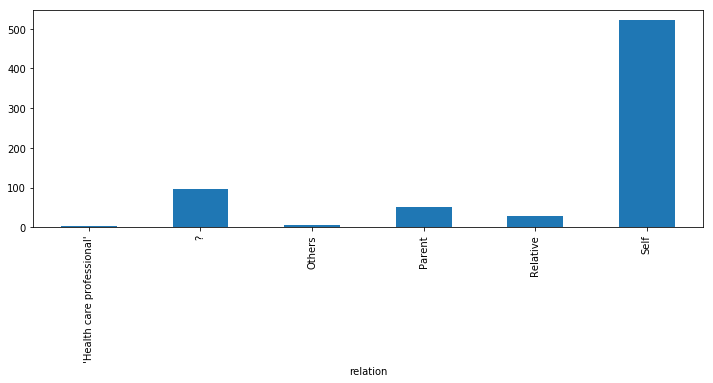

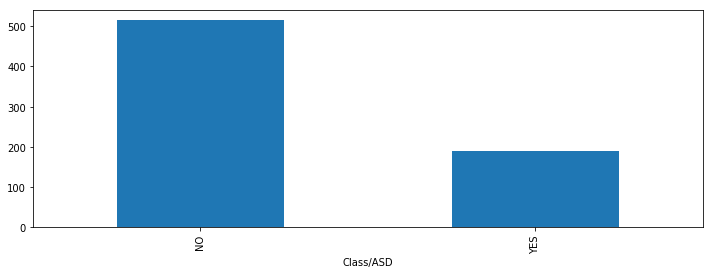

In [7]:
# Visualize categorical data
def bar_plot(df, names):
    
    for i, name in enumerate(names):

        data_cross = pd.crosstab(index = df[name], columns = "count")
        data_cross.plot.bar(figsize = (12,4), legend = False)
    return

names = ['age', 'gender', 'ethnicity', 'jaundice', 'family_ASD', 'country', 'used_app_before', \
        'age_desc', 'relation', 'Class/ASD']

bar_plot(data,names)

In [8]:
# Drop columns not related to screening questions and patient demographics

data = data.drop(['used_app_before', 'age_desc', 'relation'], axis=1)

### Data preprocessing

Next, the dataset was preprocessed using scaling, log transformations and one-hot encoding.

In [9]:
# Delete records with missing data as '?'. New dataset has 609 records.

data = data[(data['age'] != '?') & (data['ethnicity'] != '?')]

len(data)

609

In [10]:
# Change 'age' to numeric variable

data['age'] = pd.to_numeric(data['age'])

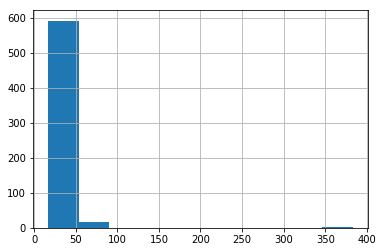

In [11]:
# Check age distribution

data['age'].hist()

In [12]:
# Delete records with age > 100.

data = data[(data['age'] < 100)]

Text(0.5,0,'Age')

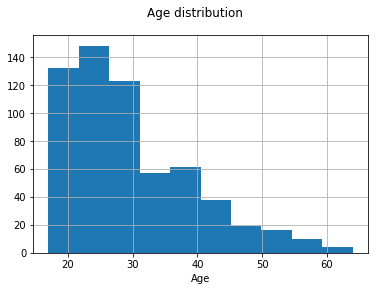

In [13]:
# Check 'age' distribution

ax = data['age'].hist()
plt.suptitle("Age distribution")
ax.set_xlabel("Age")

In [14]:
# Calculate age mean

data['age'].mean()

29.63486842105263

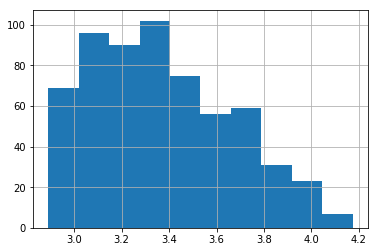

In [15]:
# Separate data into features and targets

target_raw = data['Class/ASD']
features_raw = data.drop('Class/ASD', axis = 1)

# Log-transform the skewed 'age' feature
skewed = ['age']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

features_log_transformed['age'].hist()

In [16]:
# Scale numerical features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
numerical = ['age', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', \
      'A8_Score', 'A9_Score', 'A10_Score']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

display(features_log_minmax_transform.head(n = 5))

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,family_ASD,country
0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.315779,f,White-European,no,no,'United States'
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.255841,m,Latino,no,yes,Brazil
2,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.344102,m,Latino,yes,yes,Spain
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.539828,f,White-European,no,yes,'United States'
5,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.561166,m,Others,yes,no,'United States'


In [17]:
# One-hot encode features
features_final = pd.get_dummies(features_log_minmax_transform)

# Change class data to numerical values
target = target_raw.replace(['YES','NO'], [1, 0])

features_final.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,country_Portugal,country_Romania,country_Russia,country_Serbia,country_Spain,country_Sweden,country_Tonga,country_Turkey,country_Ukraine,country_Uruguay
0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
5,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


### Algorithm selection

The data was then split into training and testing sets and an algorithm was selected.

In [18]:
# Split features and target data into training and testing sets
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0])) 

Training set has 486 samples.
Testing set has 122 samples.


In [19]:
from sklearn.metrics import recall_score, confusion_matrix

# Function to be used for recall and specificity metrics for initial classifier selection
def clf_predict(clf, X_train, X_test, y_train, y_test):
   
    clf_results = {}
    clf = clf.fit(X_train, y_train)
    clf_predictions = clf.predict(X_test)
    clf_results['recall'] = recall_score(y_test, clf_predictions)
    conf = confusion_matrix(y_test, clf_predictions)
    clf_results['specificity'] = float(conf[0][0])/(conf[0][0] + conf[0][1])
    return clf_results


In [20]:
# Evaluate performance of 4 algorithms using default parameters

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


clf_A = DecisionTreeClassifier(random_state = 42)
clf_B = SVC(random_state = 42)
clf_C = RandomForestClassifier(random_state = 42)
clf_D = GaussianNB()

results = {}

for clf in [clf_A, clf_B, clf_C, clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    
    results[clf_name] = clf_predict(clf, X_train, X_test, y_train, y_test)

for k, v in results.items():
    print(k, v)
    


DecisionTreeClassifier {'recall': 0.875, 'specificity': 0.9}
SVC {'recall': 0.90625, 'specificity': 0.9555555555555556}
RandomForestClassifier {'recall': 0.78125, 'specificity': 0.9777777777777777}
GaussianNB {'recall': 0.9375, 'specificity': 0.07777777777777778}


### Final algorithm parameter tuning and testing

The Support Vector classifier underwent further parameter tuning to optimize the recall as this was lower than the specificity. The classifier was also tested on a subset of features to examine any impact on model performance.

In [21]:
# Define specificity function to be used in model evaluation

def specificity(ground_truth, predictions):
    score_conf = confusion_matrix(ground_truth, predictions)
    return float(score_conf[0][0])/(score_conf[0][0] + score_conf[0][1])

In [22]:
# Tune the 'C' and 'gamma' parameters of the SVC

from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

clf_final_3 = SVC(random_state = 42)

# SVC parameters
parameters = {'C': range(1,10), 'gamma': np.logspace(-9, 3, 13)}

# Use recall score for grid search
recall_scorer = make_scorer(recall_score)

# Peform grid search and find the best classifier
grid_obj = GridSearchCV(clf_final_3, param_grid = parameters, scoring = recall_scorer )
grid_fit = grid_obj.fit(X_train, y_train)


best_clf = grid_fit.best_estimator_
print(best_clf)

# Make predictions using optimized model and print specificity and recall
best_predictions = best_clf.predict(X_test)

print("Recall is {}". format(recall_score(y_test, best_predictions)))

print("Specificity is {}".format(specificity(y_test, best_predictions)))

SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
Recall is 0.9375
Specificity is 0.9777777777777777


In [23]:
# Use SelectKBest and test SVM performance with subset of features

from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline

np.seterr(divide='ignore', invalid='ignore')

# Create pipeline to select subset of features with previously optimized SVC parameters.
pipe = Pipeline([
    ('selectK', SelectKBest()),
    ('best_clf', SVC(C = 4, gamma = 0.1, random_state = 42))
])

# Define number of features
k_list = range(5, 88, 5)

param_grid = [
    {
        'selectK': [SelectKBest()],
        'selectK__k': k_list,
   
    }
]

# Use GridSearch to select number of features. Make predictions  
grid_select = GridSearchCV(pipe, param_grid=param_grid)
grid_select_fit = grid_select.fit(X_train, y_train)


best_clf_select = grid_select_fit.best_estimator_
print(best_clf_select)
best_predictions_select = best_clf_select.predict(X_test)
print("Sensitivity is {}".format(recall_score(y_test, best_predictions_select)))
print("Specificity is {}".format(specificity(y_test, best_predictions_select)))

C:\Users\Anjali\Anaconda3\envs\py35_final\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [41 46 49 51 54 55 57 59 64 74 75 78 81 85 87] are constant.
  UserWarning)
C:\Users\Anjali\Anaconda3\envs\py35_final\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [23 29 41 43 45 46 48 49 51 56 57 64 71 75 76 78 85 87] are constant.
  UserWarning)
C:\Users\Anjali\Anaconda3\envs\py35_final\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [28 32 40 41 46 49 51 53 57 64 73 75 78 83 84 85 86 87] are constant.
  UserWarning)
C:\Users\Anjali\Anaconda3\envs\py35_final\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [41 46 49 51 54 55 57 59 64 74 75 78 81 85 87] are constant.
  UserWarning)
C:\Users\Anjali\Anaconda3\envs\py35_final\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Fe

Pipeline(memory=None,
     steps=[('selectK', SelectKBest(k=20, score_func=<function f_classif at 0x000002376C689E18>)), ('best_clf', SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))])
Sensitivity is 0.9375
Specificity is 0.9888888888888889


C:\Users\Anjali\Anaconda3\envs\py35_final\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [28 32 40 41 46 49 51 53 57 64 73 75 78 83 84 85 86 87] are constant.
  UserWarning)
C:\Users\Anjali\Anaconda3\envs\py35_final\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [41 46 49 51 54 55 57 59 64 74 75 78 81 85 87] are constant.
  UserWarning)
C:\Users\Anjali\Anaconda3\envs\py35_final\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [23 29 41 43 45 46 48 49 51 56 57 64 71 75 76 78 85 87] are constant.
  UserWarning)
C:\Users\Anjali\Anaconda3\envs\py35_final\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [28 32 40 41 46 49 51 53 57 64 73 75 78 83 84 85 86 87] are constant.
  UserWarning)
C:\Users\Anjali\Anaconda3\envs\py35_final\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWa

In [24]:
# Obtain feature names and scores from SelectKBest

from itertools import compress
from pprint import pprint

support = best_clf_select.named_steps['selectK'].get_support()
feature_list = X_train.columns.values

selected_features = list(compress(feature_list, support))
pprint(selected_features)

# Obtain feature scores.
scores = best_clf_select.named_steps['selectK'].scores_
selected_features_scores = list(compress(scores, support))

pprint(selected_features_scores)



['A1_Score',
 'A2_Score',
 'A3_Score',
 'A4_Score',
 'A5_Score',
 'A6_Score',
 'A7_Score',
 'A8_Score',
 'A9_Score',
 'A10_Score',
 "ethnicity_'Middle Eastern '",
 "ethnicity_'South Asian'",
 'ethnicity_Asian',
 'ethnicity_Latino',
 'ethnicity_White-European',
 'family_ASD_no',
 'family_ASD_yes',
 "country_'United Arab Emirates'",
 "country_'United States'",
 'country_India']
[44.538565353354706,
 69.16301684990799,
 103.9724164270129,
 142.23450328599756,
 215.9941753959794,
 285.06451520203274,
 75.52823598575229,
 28.684426276057742,
 402.0519939397213,
 76.8287348519807,
 15.079895879756812,
 6.372009844734426,
 23.205087573601485,
 6.760591833242734,
 40.963842784147246,
 11.200985310320405,
 11.200985310320192,
 18.50122477149717,
 20.470669123777625,
 21.836695596926077]


Text(0.5,1,'SelectKbest Features Scores v. Features of Dataset ')

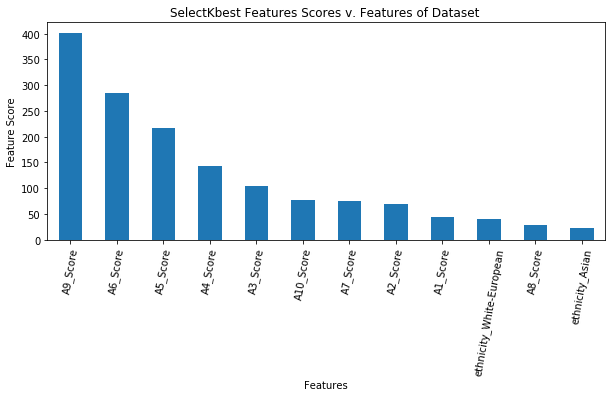

In [25]:
# Plot features by descending feature scores

features_scores = pd.DataFrame(
    {'Features': selected_features,
     'Score': selected_features_scores
    })
features_scores.head()
features_scores = features_scores.sort_values('Score', ascending=False)
features_scores = features_scores.set_index('Features')
ax = features_scores.iloc[:12].plot.bar(legend = False, figsize = (10,4), rot = 80)
ax.set_ylabel("Feature Score" )
plt.title("SelectKbest Features Scores v. Features of Dataset ")

C:\Users\Anjali\Anaconda3\envs\py35_final\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [13] are constant.
  UserWarning)
C:\Users\Anjali\Anaconda3\envs\py35_final\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [13] are constant.
  UserWarning)
C:\Users\Anjali\Anaconda3\envs\py35_final\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [13] are constant.
  UserWarning)
C:\Users\Anjali\Anaconda3\envs\py35_final\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [17] are constant.
  UserWarning)
C:\Users\Anjali\Anaconda3\envs\py35_final\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [13] are constant.
  UserWarning)
C:\Users\Anjali\Anaconda3\envs\py35_final\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [11] are

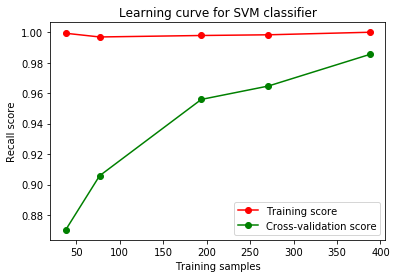

In [26]:
# Create learning curve for SVM classifier to evaluate performance

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

plt.figure()
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = best_clf_select
train_sizes = [0.10, 0.20, 0.5, 0.7, 1]
train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train[selected_features], y_train, cv=cv, n_jobs=1, train_sizes=train_sizes, \
        scoring = recall_scorer)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.xlabel("Training samples")
plt.ylabel("Recall score")
plt.title("Learning curve for SVM classifier")
plt.legend(loc="best")

In [90]:
from sklearn.model_selection import cross_validate, StratifiedKFold

# Define StratifiedKFold object with recall and specificty metrics. Define estimator with optimized
# parameters.
scoring = {'recall': 'recall', 'specificity': make_scorer(specificity)}
estimator_default = SVC(random_state = 42)
strat_kfold = StratifiedKFold(n_splits=10, random_state=42)
estimator_valid = SVC(C = 4, gamma = 0.1, random_state = 42) 

# Obtain results from cross validation
results = cross_validate(estimator=estimator_default, X=X_train[selected_features], y=y_train, \
                         cv=strat_kfold, scoring = scoring)

# Print results and mean, std dev of results
print(results)
print(np.mean(results['test_specificity']))
print(np.std(results['test_specificity']))
print(np.mean(results['test_recall']))
print(np.std(results['test_recall']))

# Convert results to dataframe
pd.DataFrame.from_dict(results)

{'train_specificity': array([0.99342105, 0.99671053, 0.99671053, 0.99013158, 0.99671053,
       1.        , 0.99671053, 0.99342105, 0.99672131, 0.99016393]), 'fit_time': array([0.00952649, 0.00451326, 0.0095253 , 0.0040102 , 0.00602889,
       0.00300789, 0.00300789, 0.00350928, 0.00350904, 0.0030086 ]), 'test_specificity': array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.97058824, 1.        , 0.97058824, 1.        , 0.96969697]), 'train_recall': array([0.96992481, 0.96240602, 0.95488722, 0.96240602, 0.96992481,
       0.95488722, 0.97744361, 0.96992481, 0.96268657, 0.97014925]), 'score_time': array([0.00501347, 0.00250554, 0.00250745, 0.00150347, 0.00200534,
       0.00150418, 0.00150418, 0.00200558, 0.00200534, 0.00150347]), 'test_recall': array([0.93333333, 0.93333333, 0.93333333, 1.        , 0.86666667,
       1.        , 0.86666667, 0.86666667, 1.        , 0.92857143])}
0.9910873440285204
0.013616251639549168
0.9328571428571429
0.05165953428935646


C:\Users\Anjali\Anaconda3\envs\py35_final\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_recall'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Anjali\Anaconda3\envs\py35_final\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_specificity'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


,fit_time,score_time,test_recall,test_specificity,train_recall,train_specificity
0,0.009526,0.005013,0.933333,1.000000,0.969925,0.993421
1,0.004513,0.002506,0.933333,1.000000,0.962406,0.996711
2,0.009525,0.002507,0.933333,1.000000,0.954887,0.996711
3,0.004010,0.001503,1.000000,1.000000,0.962406,0.990132
4,0.006029,0.002005,0.866667,1.000000,0.969925,0.996711
5,0.003008,0.001504,1.000000,0.970588,0.954887,1.000000
6,0.003008,0.001504,0.866667,1.000000,0.977444,0.996711
7,0.003509,0.002006,0.866667,0.970588,0.969925,0.993421
8,0.003509,0.002005,1.000000,1.000000,0.962687,0.996721
9,0.003009,0.001503,0.928571,0.969697,0.970149,0.990164


### Deep learning model

A deep learning model was created to compare with the previous SVC model.

In [27]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np

np.random.seed(42)

print(X_train.shape)


C:\Users\Anjali\Anaconda3\envs\py35_final\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(486, 88)


In [28]:
# Create model layers

model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (88,)))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))


# Compile model

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               45568     
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 46,081
Trainable params: 46,081
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Fit model
model.fit(X_train, y_train, epochs=80, batch_size=48, verbose=0)

In [30]:
# Predict on the test set. Convert test set to 1 or 0 based on sigmoid function probability
y_pred_nn = model.predict(X_test)
y_pred_nn = [1 if i > 0.5 else 0 for i in y_pred_nn]

In [31]:
# Define sensitivity metric for evaluation

def sensitivity(ground_truth, predictions):
    score_conf = confusion_matrix(ground_truth, predictions)
    return float(score_conf[1][1])/(score_conf[1][1] + score_conf[1][0])

# Test model specificity and sensitivity
print("Specificity is {}".format(specificity(y_test, y_pred_nn)))
print("Sensitivity is {}".format(sensitivity(y_test, y_pred_nn)))

# Differences in peformance by # of neurons is listed below:
# 512 neurons - Specificity  = 0.944, Sensitivity = 0.969
# 256 neurons - Specificty = 0.938, Sensitivity = 0.967
# 128 neurons - Specificity = 0.956, Sensitivity =  0.969

Specificity is 0.9444444444444444
Sensitivity is 0.96875


In [32]:
# Create deep learning model with SelectKbest feature subset

print(X_train[selected_features].shape)

(486, 20)


In [33]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = (20,)))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))


# Compile model

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               2688      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Split training data into validation and training data

X_train_nn = X_train[selected_features][:386]
y_train_nn = y_train[:386]
X_val = X_train[selected_features][386:]
y_val = y_train[386:]

In [35]:
# Fit model
nn_model = model.fit(X_train_nn, y_train_nn, epochs=80, batch_size=48, \
          validation_data = (X_val, y_val), verbose=0)

In [36]:
# Predict on the test set

y_pred_nn_selected = model.predict(X_test[selected_features])
y_pred_nn_selected = [1 if i > 0.5 else 0 for i in y_pred_nn_selected]

In [37]:
# Test model specificity and sensitivity
print("Optimized specificity is {}".format(specificity(y_test, y_pred_nn_selected)))
print("Optimized sensitivity is {}".format(sensitivity(y_test, y_pred_nn_selected)))


Optimized specificity is 0.9222222222222223
Optimized sensitivity is 0.96875


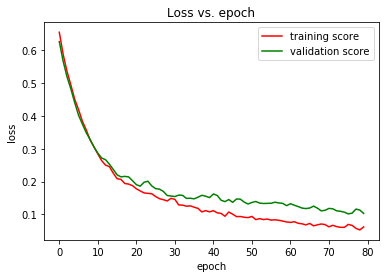

In [38]:
# plot train and validation loss
plt.plot(nn_model.history['loss'], color = 'r')
plt.plot(nn_model.history['val_loss'], color = 'g')
plt.title('Loss vs. epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training score', 'validation score'], loc='upper right')
plt.show()

In [55]:
# Create model with only 25 training epochs

model_2 = Sequential()
model_2.add(Dense(128, activation = 'relu', input_shape = (20,)))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation = 'sigmoid'))


# Compile model

model_2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               2688      
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 129       
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [56]:
X_train_nn = X_train[selected_features][:386]
y_train_nn = y_train[:386]
X_val = X_train[selected_features][386:]
y_val = y_train[386:]

In [57]:
# Fit model
nn_model_2 = model_2.fit(X_train_nn, y_train_nn, epochs=25, batch_size=48, \
          validation_data = (X_val, y_val), verbose=0)

In [58]:
y_pred_nn_selected = model_2.predict(X_test[selected_features])
y_pred_nn_selected = [1 if i > 0.5 else 0 for i in y_pred_nn_selected]

In [59]:
# Test model specificity and sensitivity
print("Optimized specificity is {}".format(specificity(y_test, y_pred_nn_selected)))
print("Optimized sensitivity is {}".format(sensitivity(y_test, y_pred_nn_selected)))


Optimized specificity is 0.9555555555555556
Optimized sensitivity is 0.875


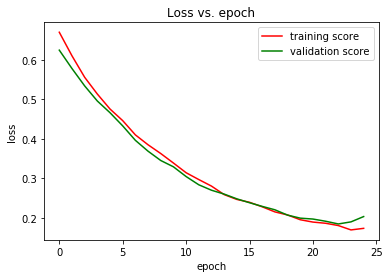

In [60]:

# plot train and validation loss
plt.plot(nn_model_2.history['loss'], color = 'r')
plt.plot(nn_model_2.history['val_loss'], color = 'g')
plt.title('Loss vs. epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training score', 'validation score'], loc='upper right')
plt.show()

In [105]:
# Define Stratified KFold object. Use features selected from SelectKbest
stratkfold_deep = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
X_train_select = X_train[selected_features]
X_train_select = X_train_select.reset_index(drop=True)
cvscores_specificity = []
cvscores_sensitivity = []

# Obtain specificity and sensitivity results from each Stratified Kfold split
for train, test in stratkfold_deep.split(X_train_select, y_train):
    model_stratfold_deep = Sequential()
    model_stratfold_deep.add(Dense(128, activation = 'relu', input_shape = (20,)))
    model_stratfold_deep.add(Dropout(0.2))
    model_stratfold_deep.add(Dense(1, activation = 'sigmoid'))
    model_stratfold_deep.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_stratfold_deep.fit(X_train_select.iloc[train], y_train.iloc[train], epochs=25, batch_size=10, verbose=0)
    y_pred_nn_selected_stratkfold = model_stratfold_deep.predict(X_train_select.iloc[test])
    y_pred_nn_selected_stratkfold = [1 if i > 0.5 else 0 for i in y_pred_nn_selected_stratkfold ]
    cvscores_specificity.append((specificity(y_train.iloc[test], y_pred_nn_selected_stratkfold)))
    cvscores_sensitivity.append((sensitivity(y_train.iloc[test], y_pred_nn_selected_stratkfold)))

# Print specificity and sensitivity scores    
print(cvscores_specificity)
print(cvscores_sensitivity)

[1.0, 0.9705882352941176, 0.9705882352941176, 0.9705882352941176, 0.9705882352941176, 1.0, 0.9411764705882353, 1.0, 1.0, 0.8787878787878788]
[1.0, 1.0, 1.0, 0.8666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 1.0, 1.0, 0.9285714285714286]
